<a href="https://colab.research.google.com/github/Vaani64/Deep_Learning_Codes/blob/main/Implement_Variational_Autoencoders_for_image_denoising_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)


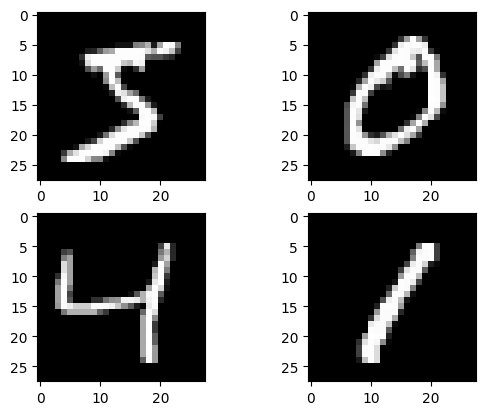

Shape of reshaped training data: (60000, 784)
Shape of reshaped test data: (10000, 784)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Training the model...
Epoch 1/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 44ms/step - loss: 0.0687 - val_loss: 0.0203
Epoch 2/2
300/300 ━━━━━━━━━━━━━━━━━━━━ 15s 50ms/step - loss: 0.0185 - val_loss: 0.0138
Evaluating the model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step
Shape of predicted data: (10000, 784)
Shape of test data: (10000, 784)
Test Images


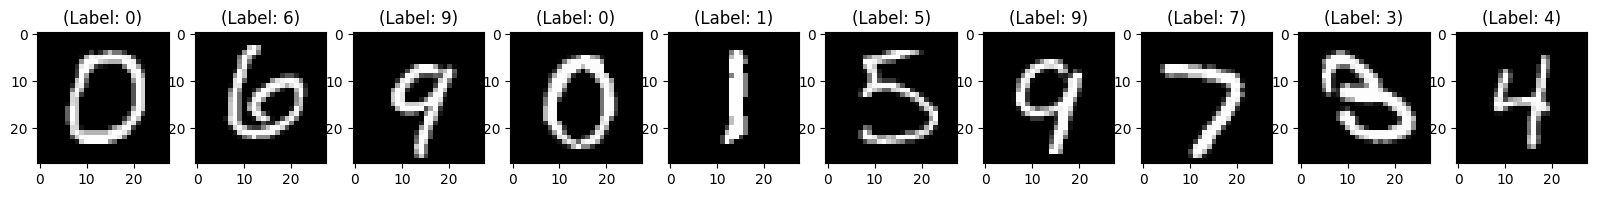

Test Images with Noise


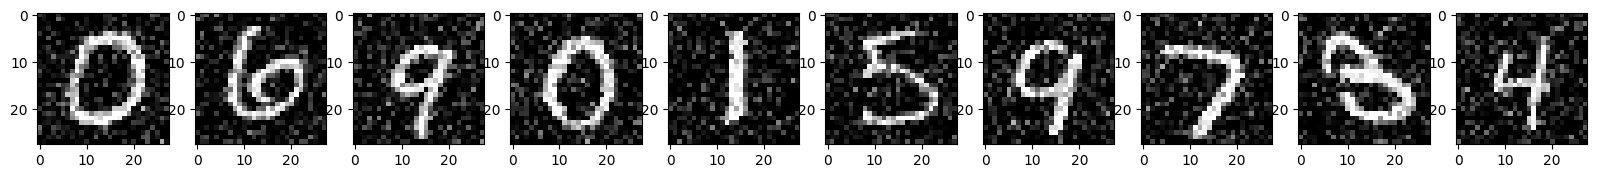

Reconstruction of Noisy Test Images


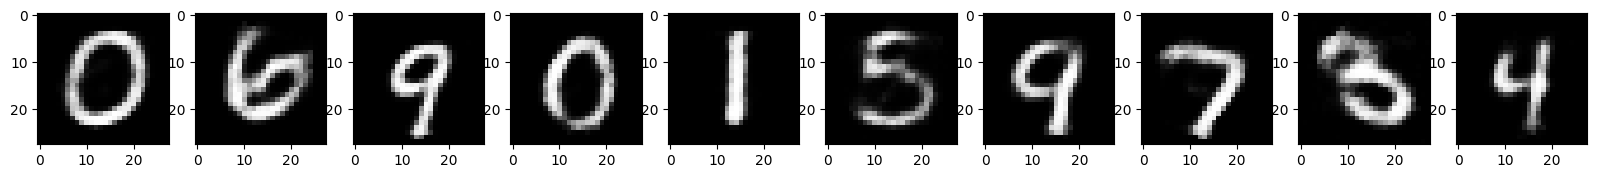

In [12]:

import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import mnist

# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Print the shape of the training and test sets
print(f"Training data shape: {X_train.shape}")
print(f"Test data shape: {X_test.shape}")

# Display first four training images
plt.subplot(221)
plt.imshow(X_train[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(X_train[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(X_train[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(X_train[3], cmap=plt.get_cmap('gray'))
# Show the plot
plt.show()

# Flatten the images and normalize them
num_pixels = X_train.shape[1] * X_train.shape[2]
X_train = X_train.reshape(X_train.shape[0], num_pixels).astype('float32')
X_test = X_test.reshape(X_test.shape[0], num_pixels).astype('float32')
X_train = X_train / 255
X_test = X_test / 255

# Print the new shape of the data
print(f"Shape of reshaped training data: {X_train.shape}")
print(f"Shape of reshaped test data: {X_test.shape}")

# Add Gaussian noise to the images
noise_factor = 0.2
x_train_noisy = X_train + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_train.shape)
x_test_noisy = X_test + noise_factor * numpy.random.normal(loc=0.0, scale=1.0, size=X_test.shape)
x_train_noisy = numpy.clip(x_train_noisy, 0., 1.)
x_test_noisy = numpy.clip(x_test_noisy, 0., 1.)

# Create the model
model = Sequential()
model.add(Dense(500, input_dim=num_pixels, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(300, activation='relu'))
model.add(Dense(500, activation='relu'))
model.add(Dense(784, activation='sigmoid'))  # 784 = 28 * 28 (image size)

# Compile the model
model.compile(loss='mean_squared_error', optimizer='adam')

# Training the model
print("Training the model...")
model.fit(x_train_noisy, X_train, validation_data=(x_test_noisy, X_test), epochs=2, batch_size=200)

# Final evaluation of the model
print("Evaluating the model...")
pred = model.predict(x_test_noisy)

# Print shapes of predicted and test data
print(f"Shape of predicted data: {pred.shape}")
print(f"Shape of test data: {X_test.shape}")

# Reshape the data back to image format for visualization
X_test = numpy.reshape(X_test, (10000,28,28)) * 255
pred = numpy.reshape(pred, (10000,28,28)) * 255
x_test_noisy = numpy.reshape(x_test_noisy, (-1,28,28)) * 255

# Plot original test images
plt.figure(figsize=(20, 4))
print("Test Images")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(X_test[i, :, :], cmap='gray')
    curr_lbl = y_test[i]
    plt.title(f"(Label: {curr_lbl})")
plt.show()

# Plot noisy test images
plt.figure(figsize=(20, 4))
print("Test Images with Noise")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(x_test_noisy[i, :, :], cmap='gray')
plt.show()

# Plot denoised (reconstructed) images
plt.figure(figsize=(20, 4))
print("Reconstruction of Noisy Test Images")
for i in range(10, 20, 1):
    plt.subplot(2, 10, i + 1)
    plt.imshow(pred[i, :, :], cmap='gray')
plt.show()